# Ultimate_technologies_Take-Home Challenge

## step1: import data

In [1]:
import numpy as np 
import pandas as pd
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
login_data = pd.read_json('C:/Users/wuhao/Desktop/springboard/ultimate_challenge/logins.json')
login_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
login_data.shape

(93142, 1)

In [4]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
login_data = login_data.set_index('login_time')

In [6]:
#aggregate these login counts based on 15-minute time intervals
login_data['count_fifteen'] = 0
login_data = login_data.resample('15min').count()
login_data.head()

,count_fifteen
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   count_fifteen  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [8]:
# visualize the data

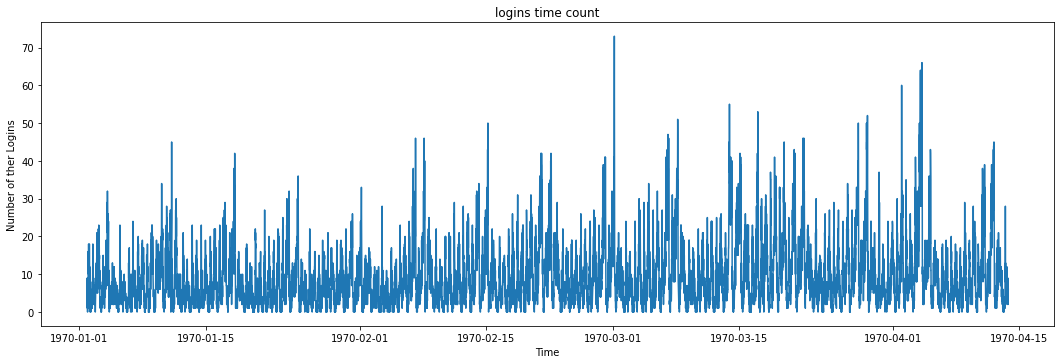

In [9]:
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Time')
plt.ylabel('Number of ther Logins')
plt.tight_layout()
plt.title('logins time count')
plt.plot(login_data)

## step 2: Exploratory Data Analysis 

In [10]:
login_data = login_data.reset_index()
login_data['weekday'] = login_data['login_time'].dt.day_name()
login_data.head()

,login_time,count_fifteen,weekday
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday


In [11]:
login_weekday = login_data.groupby('weekday', as_index = False).sum()
login_weekday

,weekday,count_fifteen
0,Friday,15208
1,Monday,8823
2,Saturday,19377
3,Sunday,18167
4,Thursday,11960
5,Tuesday,9268
6,Wednesday,10339


Text(0.5, 1.0, 'Logins by Day of Week')

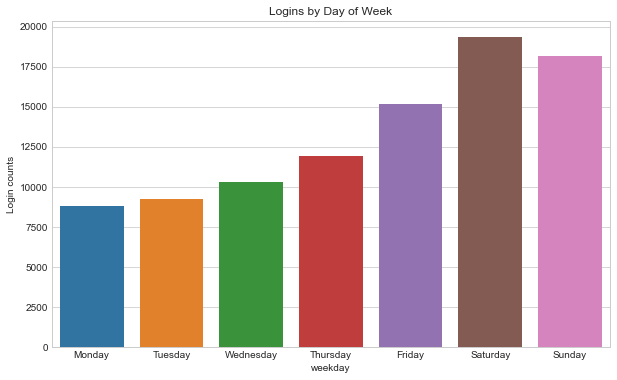

In [12]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (10,6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday' ]

sns.barplot(x = 'weekday', y ='count_fifteen', data = login_weekday, order = weekday_order)
plt.xlabel('weekday')
plt.ylabel('Login counts')
plt.title('Logins by Day of Week')

### explore the plot by hours

In [13]:
login_data['hour'] = login_data['login_time'].dt.hour
login_data.head()

,login_time,count_fifteen,weekday,hour
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21


In [14]:

login_hour = login_data.groupby('hour', as_index=False).sum()
login_hour.head()

,hour,count_fifteen
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


Text(0.5, 1.0, 'Logins by Hour')

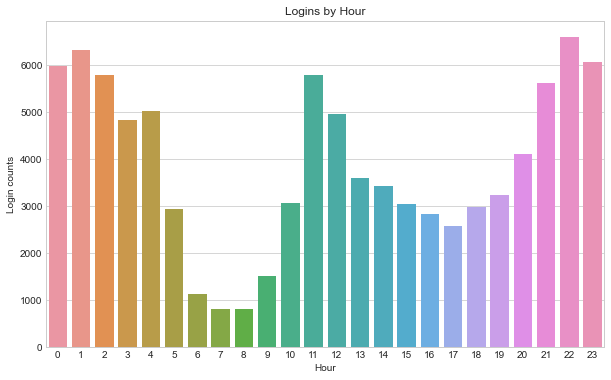

In [15]:
fig = plt.figure(figsize=(10,6))

sns.barplot(x = 'hour', y = 'count_fifteen', data = login_hour)
plt.xlabel('Hour')
plt.ylabel('Login counts')
plt.title('Logins by Hour')

### Conclusion: Logins happened mostly between 21-4 & 11-12. Meanwhile, logins have happened less from 5am - 9am. Most of those activities happened on weekend. 

answer for question 1: I would like to use the weekday and weekend avtivities as the key measure for this experiment. Because normally, the activities between weekday 5 am - 10 am are quite low, if this offer can stimulate people to travel, this means the effectness of this offer. meanwhile, I want to doulble check whether there is a sharp increase during the weekend. If it does, it also means that this offer has some effect. 

answer for question 2: 
a.construt a hypothesis:
Null hypothesis: After the offer released, the mean of cars entering the bridge from Gotham during 20 pm -2 am weekday and the mean of cars entering the bridge to Metropolis during 5 am - 10 am weekday have remian the same.
alternative hypothesis:After the offer released, the mean of cars entering the bridge from Gotham during 20 pm -2 am weekday and the mean of cars entering the bridge to Metropolis during 5 am - 10 am weekday have increase alot.
It also make sense that do the similar test for weekend.

b.I will use one-tailed Z-test to do the statistical test and set the significant level to 0.05.

c.If we can not reject the Null hypo, then we may said that the offer need some improvement. Otherwise, this offer will be validated.  

## step 3: Feature Engineering

In [16]:
with open('C:/Users/wuhao/Desktop/springboard/ultimate_challenge/ultimate_data_challenge.json') as d:
    data = json.load(d)
    
traveler_data = pd.DataFrame(data)



In [17]:
traveler_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [18]:
# transfer the two date columns into datetime type

In [19]:
traveler_data['signup_date'] = pd.to_datetime(traveler_data['signup_date'])
traveler_data['last_trip_date'] = pd.to_datetime(traveler_data['last_trip_date'])
#find the date that the data has been pulled out
pull_date = traveler_data.last_trip_date.max()
#calculate the previous day
pre_day = pull_date - pd.Timedelta('30 days')
#define the column 'status'
traveler_data['status'] = (traveler_data.last_trip_date > pre_day).astype('int')

traveler_data = pd.get_dummies(traveler_data, columns = ['city', 'phone'])


active_traveler = traveler_data[traveler_data.status == 1]
inactive_traveler = traveler_data[traveler_data.status == 0]

In [20]:
traveler_data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,status,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0


In [21]:
#calculate the fraction of the observed users were retained

fraction = round((len(active_traveler.status) / len(traveler_data.status))*100, 4)
print('{} percent of the observed users were retained '.format(fraction))

36.62 percent of the observed users were retained 


## step 4: Model Selection

In [22]:

from sklearn.linear_model import RidgeClassifier, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from lightgbm import LGBMClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import  RandomizedSearchCV, KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from xgboost import XGBClassifier, cv, plot_importance 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
import warnings             
warnings.filterwarnings('ignore')

In [23]:

feature_columns = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'city_Astapor',
 "city_King's Landing", 'city_Winterfell', 'phone_Android','phone_iPhone']
X = traveler_data[feature_columns]
y = traveler_data.status
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [24]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = 5))
    return(rmse)


In [25]:

lgb = LGBMClassifier()
xgb = XGBClassifier()
ridge = RidgeClassifier()
svC = SVC()
gbr = GradientBoostingClassifier()
rf = RandomForestClassifier()


models = [lgb, xgb, ridge, svC, gbr, rf]
model_names = ['lgb','xgb','ridge','svr','gbr','rf']
scores = {}
 
for i, model in enumerate(models):
    score = rmse_cv(model)
    print('{} rmse score: {:.4f}, rmse std: {:.4f}'.format(model_names[i], score.mean(), score.std()))
    scores[model_names[i]] = (score.mean(), score.std())
    
rmse_df = pd.DataFrame(scores, index=['rmse_score','rmse_std'])
rmse_df.sort_values('rmse_score', axis=1, inplace=True)
rmse_df


lgb rmse score: 0.4592, rmse std: 0.0046
[19:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:21] WARNING: C:/Users/

,lgb,xgb,ridge,svr,gbr,rf
rmse_score,0.459237,0.463246,NaN,NaN,NaN,NaN
rmse_std,0.004649,0.004807,NaN,NaN,NaN,NaN


In [ ]:
# compare the XGBoost and Light Gradient Boosted Machine classifier

In [31]:
xg_clf = XGBClassifier( max_depth= 8)

In [35]:
lg_clf = LGBMClassifier( )

In [36]:
xg_clf.fit(X_train, y_train)
# predict the labels of unoptimized model
y_unopt_pred = xg_clf.predict(X_train)
# score model
un_score = accuracy_score(y_train, y_unopt_pred)
print("The resulting accuracy of the unoptimized classifier is {}.".format(round(un_score,4)))

[19:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The resulting accuracy of the unoptimized classifier is 0.8743.


In [37]:
lg_clf.fit(X_train, y_train)
# predict the labels of unoptimized model
y_unopt_pred = lg_clf.predict(X_train)
# score model
un_score = accuracy_score(y_train, y_unopt_pred)
print("The resulting accuracy of the unoptimized classifier is {}.".format(round(un_score,4)))

The resulting accuracy of the unoptimized classifier is 0.8055.


# step 5: Show the result 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

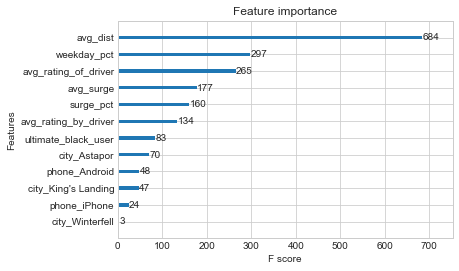

In [30]:

plot_importance(xg_clf)

#Conclusion: the XGBoost's pereformance is better than the Light Gradient Boosted Machine.The most important feature which effect the traveler is the average distance per trip.
